# **SIBCRI COVID19 Data Analysis**
# Initial Setup
*Remember to open this in Colab and clone this notebook so you can develop your own analysis*

In [0]:
# Run this  cell to install necessary packages by pressing CNTRL+ENTER or the left []

!pip install --upgrade --quiet geopandas
!pip install --upgrade --quiet mapclassify
!pip install --upgrade --quiet geemap
#!pip install --upgrade --quiet rtree

import pandas as pd
import geopandas as gpd
import geemap.eefolium as emap
import fiona
import matplotlib.pyplot as plt

from shapely import wkt
from google.colab import files


     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 10.4MB 10.7MB/s 
     |████████████████████████████████| 14.7MB 267kB/s 
     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 235kB 2.8MB/s 
     |████████████████████████████████| 4.7MB 8.7MB/s 
     |████████████████████████████████| 4.4MB 32.0MB/s 
     |████████████████████████████████| 225kB 34.6MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
     |████████████████████████████████| 112kB 52.0MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.23.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.10.1 which is incompatible.


# **GIS Development**
Mapping DataFrames that contain geographic information.  Focus on Choropleths

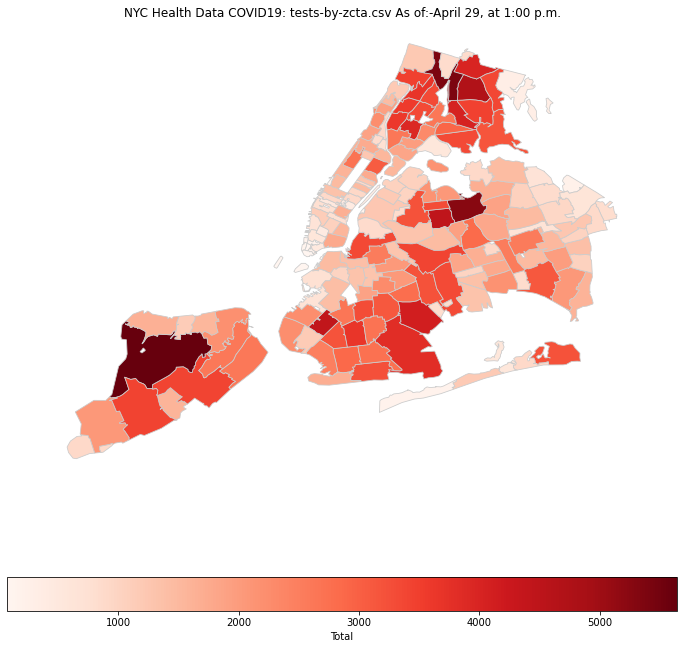

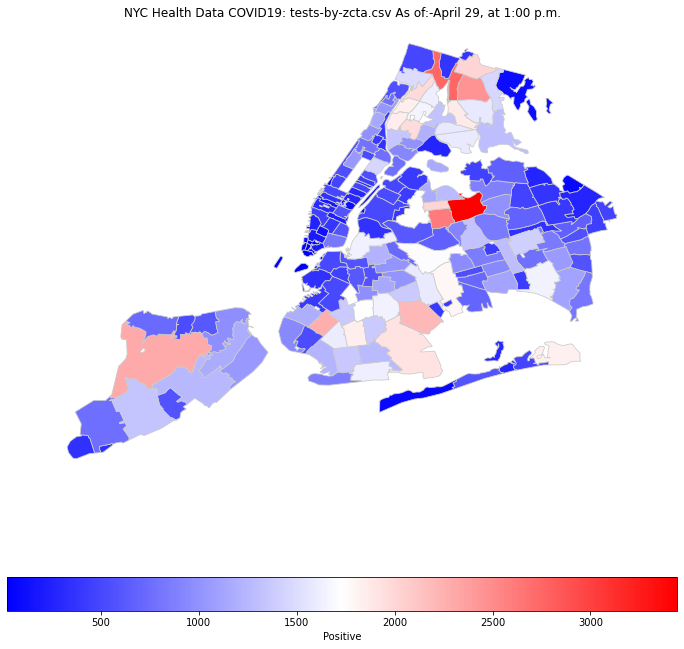

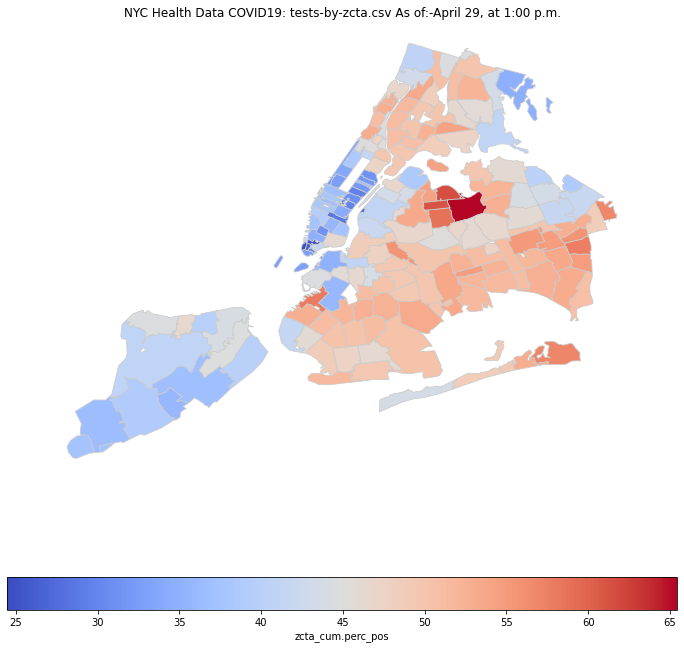

In [0]:
# Run this  cell by pressing CNTRL+ENTER or the left []

sh = pd.read_csv('https://raw.githubusercontent.com/jacolonjr/COVID19/master/shapes/NYC/zip_nyc.csv',error_bad_lines=False)
sh['geometry'] = sh['geometry'].apply(wkt.loads)
zip5 = gpd.GeoDataFrame(sh, geometry="geometry")
zip5.crs = 'epsg:4269'
summary=pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/summary.csv')

url_main = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/'
url_data_files = 'tests-by-zcta.csv'
df= pd.read_csv(url_main+url_data_files, error_bad_lines=False)
df.columns=['ZCTA5CE10', 'Positive', 'Total', 'zcta_cum.perc_pos']
df=df[df['ZCTA5CE10'].notna()]
df['ZCTA5CE10']=df.ZCTA5CE10.astype('int64')
zip5_covid = zip5.merge(df, on='ZCTA5CE10')

for variable in ['Total', 'Positive','zcta_cum.perc_pos']:
  vmin,vmax=zip5_covid[variable].min(),zip5_covid[variable].max()
  fig,ax=plt.subplots(1, figsize=(12,12))
  ax.axis('off')
  ax.set_title('NYC Health Data COVID19: '+url_data_files+' As of:-' + summary.iloc[3][1], wrap=True)
  if variable == 'Total':
    zcta_total = zip5_covid.plot(column=variable, ax=ax, cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True,legend_kwds={'label': variable,'orientation': "horizontal"})
  elif variable == 'Positive':
    zcta_positive = zip5_covid.plot(column=variable, ax=ax, cmap='bwr', linewidth=0.8, edgecolor='0.8', legend=True,legend_kwds={'label': variable,'orientation': "horizontal"})
  elif variable == 'zcta_cum.perc_pos':
    zcta_perc = zip5_covid.plot(column=variable, ax=ax, cmap='coolwarm', linewidth=0.8, edgecolor='0.8', legend=True,legend_kwds={'label': variable,'orientation': "horizontal"})


#**NYC Health COVID19 Data in DataFrames**

data retreived from: https://github.com/nychealth/coronavirus-data

In [0]:
 boro = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/boro.csv')
 age = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/by-age.csv')
 sex = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/by-sex.csv')
 case = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/case-hosp-death.csv')
 #removed  dod = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/probable-confirmed-dod.csv')
 dod_probable = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/Deaths/probable-confirmed-dod.csv')
 summary = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/summary.csv')
 zcta = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/tests-by-zcta.csv')

#**Working with DataFrames**

Think of a DataFrame as an excel-like worksheet.

For a quick review on what are/is:


1.   DataFrames, please visit [Toward Data Science](https://towardsdatascience.com/pandas-dataframe-a-lightweight-intro-680e3a212b96)
2.   IQR, visit [khan academy](https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/measuring-spread-quantitative/v/calculating-interquartile-range-iqr)


At this point, some DataFrames are ready for your analysis, namely:

*   boro
*   age
*   sex
*   case
*   dod
*   summary
*   zcta

Lets use case (case-hosp-death.csv) to briefly explore what can be done with DataFrames.











In [0]:
# Get a feel for the data, press CNTRL+ENTER or [ ] from now on to run a cell

case.head()

,DATE_OF_INTEREST,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
0,3/3/20,1,6.0,NaN
1,3/4/20,5,10.0,NaN
2,3/5/20,3,15.0,NaN
3,3/6/20,7,11.0,NaN
4,3/7/20,7,10.0,NaN


In [0]:
# Now that we know what the data looks like, lets get some simple statistics

case.describe()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
count,56.000000,56.000000,47.000000
mean,2816.267857,703.696429,250.106383
std,1913.363355,578.846782,189.457605
min,2.000000,1.000000,1.000000
25%,928.500000,147.250000,58.000000
50%,3240.500000,572.500000,262.000000
75%,4079.500000,1266.750000,450.000000
max,6202.000000,1735.000000,556.000000


In [0]:
# While looking at the stats we want to know when the minimum for "NEW_COVID_CASE_COUNT" ocurred

case[case['NEW_COVID_CASE_COUNT']==1]

,DATE_OF_INTEREST,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
0,3/3/20,1,6.0,NaN


In [0]:
# We want to select a data range and create a new DataFrame so that it can be analyzed
# 
# The "DATE_OF_INTEREST" data in this case is not normalized, instead of 04/03/20 or 
#      20200403, we have 4/3/20 and at the same time we have 4/10/20 , to avoid 
#      confusion, lets use the index number of each row to select range.

case_min=case[case['DATE_OF_INTEREST']=='4/3/20'].index[0]
case_max=case[case['DATE_OF_INTEREST']=='4/10/20'].index[0]
df_case = case[case_min:case_max+1]

df_case

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
31,4/3/20,5491,1628,459.0
32,4/4/20,3741,1390,470.0
33,4/5/20,3597,1379,526.0
34,4/6/20,6202,1731,540.0
35,4/7/20,5896,1558,560.0
36,4/8/20,5388,1472,507.0
37,4/9/20,4850,1239,511.0
38,4/10/20,4210,1169,483.0


In [0]:
# Get some simple statistics for this new DataFrame df_case

df_case.describe()

,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
count,8.000000,8.000000,8.000000
mean,4915.125000,1410.875000,495.875000
std,981.249268,205.275033,34.211266
min,3594.000000,1105.000000,453.000000
25%,4090.750000,1322.500000,467.000000
50%,5112.000000,1407.000000,492.000000
75%,5580.000000,1543.500000,522.500000
max,6198.000000,1688.000000,550.000000


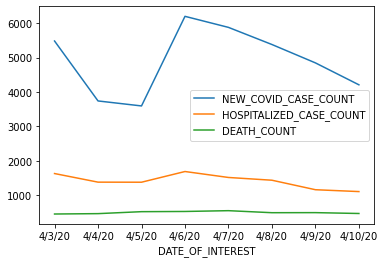

In [0]:
# Plot the datapoints for the new DataFrame and use "DATE_OF_INTEREST" as the x coordinate

df_case.plot(x='DATE_OF_INTEREST')

In [0]:
# Merge the new DataFrame with another DataFrame (dod) only for the dates that are the same

df_inner = pd.merge(df_case,dod_probable,left_on='DATE_OF_INTEREST', right_on='date_of_death')

df_inner

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,date_of_death,CONFIRMED_COUNT,PROBABLE_COUNT
0,4/3/20,5491,1628,459.0,4/3/20,459,189.0
1,4/4/20,3741,1390,470.0,4/4/20,470,208.0
2,4/5/20,3597,1379,526.0,4/5/20,526,201.0
3,4/6/20,6202,1731,540.0,4/6/20,540,253.0
4,4/7/20,5896,1558,560.0,4/7/20,560,253.0
5,4/8/20,5388,1472,507.0,4/8/20,507,229.0
6,4/9/20,4850,1239,511.0,4/9/20,511,222.0
7,4/10/20,4210,1169,483.0,4/10/20,483,217.0


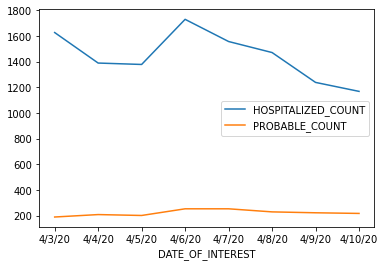

In [0]:
# Create a plot for specific columns in the new DataFrame df_inner that has the joined data
df_inner[['DATE_OF_INTEREST','HOSPITALIZED_COUNT','PROBABLE_COUNT']].plot(x='DATE_OF_INTEREST')

In [0]:
# Are there any correlations between some columns in df_inner

df_inner[['CASE_COUNT','PROBABLE_COUNT','HOSPITALIZED_COUNT']].corr()

,CASE_COUNT,PROBABLE_COUNT,HOSPITALIZED_COUNT
CASE_COUNT,1.000000,0.643513,0.727284
PROBABLE_COUNT,0.643513,1.000000,0.326712
HOSPITALIZED_COUNT,0.727284,0.326712,1.000000


In [0]:
# You have finished your analysis and want to download the DataFrame as csv

filename='case_dod_04032020-04192020.csv'
df_inner.to_csv(filename)
files.download(filename)